# <a id='toc1_'></a>[Rozdział 8. Całkowanie](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Rozdział 8. Całkowanie](#toc1_)    
  - [Moduł  `integrate.quad` z SciPy - całkowanie funkcji danej wzorem](#toc1_1_)    
    - [Prosty przykład całkowania](#toc1_1_1_)    
    - [Dodatkowe argumenty](#toc1_1_2_)    
    - [Granice niewłaściwe](#toc1_1_3_)    
    - [Funkcje nieciągłe](#toc1_1_4_)    
  - [Całki z funkcji w postaci tablicowej](#toc1_2_)    
  - [Całki wielokrotne](#toc1_3_)    
  - [Całkowanie symboliczne i z całkowanie z dowolną precyzją](#toc1_4_)    
    - [Całkowanie z dowolną precyzją](#toc1_4_1_)    
    - [Całki krzywoliniowe](#toc1_4_2_)    
    - [Transformaty całkowe](#toc1_4_3_)    
      - [Transformata Laplace'a](#toc1_4_3_1_)    
      - [Transformata Fouriera](#toc1_4_3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Libraries:**

- [NumPy](https://numpy.org/)
- [SymPy](https://www.sympy.org/en/index.html)
- [Matplotlib](https://matplotlib.org/)
- [SciPy](https://scipy.org/)

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

from scipy import integrate

import sympy
import mpmath
sympy.init_printing(pretty_print=True)

## <a id='toc1_1_'></a>[Moduł  `integrate.quad` z SciPy - całkowanie funkcji danej wzorem](#toc0_)

### <a id='toc1_1_1_'></a>[Prosty przykład całkowania](#toc0_)

In [2]:
f = lambda x: np.exp(-x**2)
val, err = integrate.quad(f, -1, 1)
val, err

### <a id='toc1_1_2_'></a>[Dodatkowe argumenty](#toc0_)

In [5]:
f = lambda x, a, b, c: a * np.exp(-((x-b)/c)**2)
val, err = integrate.quad(lambda x: f(x, 1, 2, 3), -1, 1)
val, err

### <a id='toc1_1_3_'></a>[Granice niewłaściwe](#toc0_)

In [6]:
f = lambda x: np.exp(-x**2)
val, err = integrate.quad(f, -np.inf, np.inf)
val, err

### <a id='toc1_1_4_'></a>[Funkcje nieciągłe](#toc0_)

In [8]:
f = lambda x: 1/np.sqrt(abs(x))
a, b = -1, 1
integrate.quad(f, a, b, points=[0]) # points - lista punktow jakich procedura ma unikac w czasie calkowania

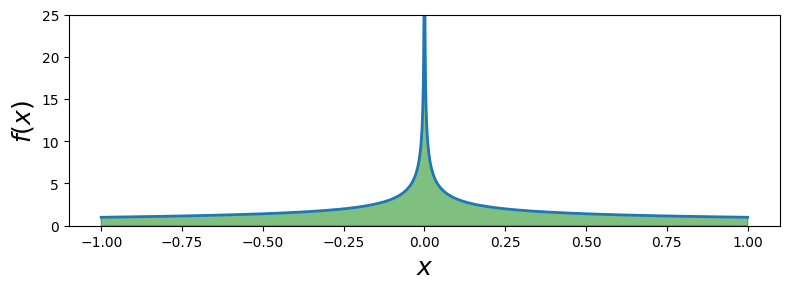

In [9]:
fig, ax = plt.subplots(figsize=(8, 3))

x = np.linspace(a, b, 10000)
ax.plot(x, f(x), lw=2)
ax.fill_between(x, f(x), color='green', alpha=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_ylim(0, 25)

fig.tight_layout();

## <a id='toc1_2_'></a>[Całki z funkcji w postaci tablicowej](#toc0_)

In [12]:
f = lambda x: np.sqrt(x)
a, b = 0, 2
x = np.linspace(a, b, 25)
y = f(x)

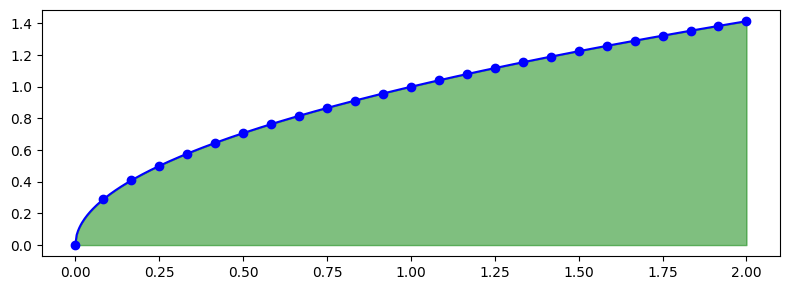

In [13]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'bo')
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='green', alpha=0.5)
fig.tight_layout();

In [19]:
val_trapz = integrate.trapezoid(y, x=x)
val_trapz

In [20]:
val_simps = integrate.simpson(y, x=x, even='first')
val_simps

## <a id='toc1_3_'></a>[Całki wielokrotne](#toc0_)

In [6]:
f = lambda x, y: np.exp(-x**2-y**2)
x1, x2 = 0, 1
y1 = lambda x: -1 + x
y2 = lambda x: 1 - x
integrate.dblquad(f, x1, x2, y1, y2)

In [7]:
f = lambda x, y, z: np.exp(-x**2-y**2-z**2)
x1, x2 = 0, 1
y1 = lambda x : 0
y2 = lambda x : 1
z1 = lambda x, y : 0
z2 = lambda x, y : 1
integrate.tplquad(f, x1, x2, y1, y2, z1, z2)

## <a id='toc1_4_'></a>[Całkowanie symboliczne i z całkowanie z dowolną precyzją](#toc0_)

### <a id='toc1_4_1_'></a>[Całkowanie z dowolną precyzją](#toc0_)

In [3]:
x = sympy.symbols("x")
f = 2 * sympy.sqrt(1-x**2)
a, b = -1, 1

val_sym = sympy.integrate(f, (x, a, b))
val_sym

In [5]:
mpmath.mp.dps = 75
f_mpmath = sympy.lambdify(x, f, 'mpmath')
val = mpmath.quad(f_mpmath, (a, b))
val = sympy.sympify(val)
val

### <a id='toc1_4_2_'></a>[Całki krzywoliniowe](#toc0_)

In [8]:
t, x, y = sympy.symbols("t, x, y")
C = sympy.Curve([sympy.cos(t), sympy.sin(t)], (t, 0, 2 * sympy.pi))
sympy.line_integrate(x**2 * y**2, C, [x, y])

### <a id='toc1_4_3_'></a>[Transformaty całkowe](#toc0_)

#### <a id='toc1_4_3_1_'></a>[Transformata Laplace'a](#toc0_)

In [12]:
s = sympy.symbols("s")
a, t = sympy.symbols("a, t", positive=True)
f = sympy.sin(a*t)
f

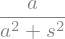

In [13]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

In [14]:
sympy.inverse_laplace_transform(F, s, t, noconds=True)

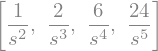

In [17]:
[sympy.laplace_transform(f, t, s, noconds=True) for f in [t, t**2, t**3, t**4]]

In [15]:
n = sympy.symbols("n", integer=True, positive=True)
sympy.laplace_transform(t**n, t, s, noconds=True)

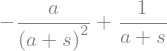

In [16]:
sympy.laplace_transform((1 - a*t) * sympy.exp(-a*t), t, s, noconds=True)

#### <a id='toc1_4_3_2_'></a>[Transformata Fouriera](#toc0_)

In [18]:
w = sympy.symbols("omega")
f = sympy.exp(-a*t**2)
f

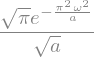

In [19]:
F = sympy.fourier_transform(f, t, w)
F

In [20]:
sympy.inverse_fourier_transform(F, w, t)